In [1]:
# modules for matrix operations
import numpy as np
import scipy.linalg

# modules for visualization
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.path import Path
import matplotlib.patches as patches
# from http://matplotlib.org/users/path_tutorial.html
'''
verts should look like this:
verts = [
    (0., 0.), # left, bottom
    (0., 1.), # left, top
    (1., 1.), # right, top
    (1., 0.), # right, bottom
    (0., 0.), # ignored
    ]
''' 
# codes that specify how to create a polygon path with the above vertices.
codes = [Path.MOVETO,
         Path.LINETO,
         Path.LINETO,
         Path.LINETO,
         Path.CLOSEPOLY,
         ]

# Choose an $\mathbf{F}$ and derive related quantities

In [2]:
# Deformation gradient
F = np.array([[1.0, 1.5], [1.6, 1.5]])

# Right Cauchy-Green tensor
C = np.dot(np.transpose(F), F)

# Left Cauchy-Green tensor
B = np.dot(F, np.transpose(F))

# Compute R and U. F = RU. C = F^T.F = U^T.R^T.R.U = U^2 --> U = sqrt(C).
U = scipy.linalg.sqrtm(C)
Ru = np.dot(F, np.linalg.inv(U))
print 'Ru=',Ru
print 'U=',U
print 'F=',F
print 'Ru.U=',np.dot(Ru,U)

# Compute V and R. F = VR. B = F.F^T = V.R.R^T.V^T = V^2 --> V = sqrt(B).
V = scipy.linalg.sqrtm(B)
Rv = np.dot(np.linalg.inv(V), F)
print 'V=',V
print 'Rv=',Rv
#print F
#print np.dot(V,R)

# C = F^T.F --> E = 0.5*(C-I)
E = 0.5*(C - np.eye(2))

# \partial u/\partial X = F - I.
dudX = F - np.eye(2)
eps = 0.5 * ( dudX + np.transpose(dudX))

Ru= [[-0.15923244  0.98724112]
 [ 0.98724112  0.15923244]]
U= [[ 1.42035335  1.24201302]
 [ 1.24201302  1.71971034]]
F= [[ 1.   1.5]
 [ 1.6  1.5]]
Ru.U= [[ 1.   1.5]
 [ 1.6  1.5]]
V= [[ 1.32162924  1.22608978]
 [ 1.22608978  1.81843445]]
Rv= [[-0.15923244  0.98724112]
 [ 0.98724112  0.15923244]]


In [3]:
# Define a set of points in the reference configuration.
ref_points = np.array([[0.0, 0.0],[1.0, 0.0],[1.0, 1.0],[0.0,1.0]])
num_points = ref_points.shape[0]
#print ref_points
#print ref_points.shape

# create a path for the reference configuration
verts = []
for i in range(4):
    verts.append( (ref_points[i][0],ref_points[i][1]) )
verts.append((ref_points[0][0],ref_points[0][1]))
ref_polygon = Path(verts, codes)

# Create an array for mapped points
cur_points = np.zeros((4,2))
#print cur_points
#print cur_points.shape

# Map the points in the reference configuration

In [4]:
# create a path for F.X
for i in range(num_points):
    cur_points[i] = np.dot(F, ref_points[i])
    verts[i] = (cur_points[i][0], cur_points[i][1])
verts[num_points] = (cur_points[0][0], cur_points[0][1])
polygon_by_F = Path(verts, codes)

In [5]:
# create a path for U.X
for i in range(num_points):
    cur_points[i] = np.dot(U, ref_points[i])
    verts[i] = (cur_points[i][0], cur_points[i][1])
verts[num_points] = (cur_points[0][0], cur_points[0][1])
polygon_by_U = Path(verts, codes)

# create a path for Ru.U.X
for i in range(num_points):
    cur_points[i] = np.dot(Ru, cur_points[i])
    verts[i] = (cur_points[i][0],cur_points[i][1])
verts[num_points] = (cur_points[0][0],cur_points[0][1])
polygon_by_RuU = Path(verts, codes)

In [6]:
# create a path for Rv.X
for i in range(num_points):
    cur_points[i] = np.dot(Rv, ref_points[i])
    verts[i] = (cur_points[i][0], cur_points[i][1])
verts[num_points] = (cur_points[0][0], cur_points[0][1])
polygon_by_Rv = Path(verts, codes)

# create a path for V.Rv.X
for i in range(num_points):
    cur_points[i] = np.dot(V, cur_points[i])
    verts[i] = (cur_points[i][0],cur_points[i][1])
verts[num_points] = (cur_points[0][0],cur_points[0][1])
polygon_by_VRv = Path(verts, codes)

## Plot the reference and the current configuration.

I followed http://matplotlib.org/users/path_tutorial.html

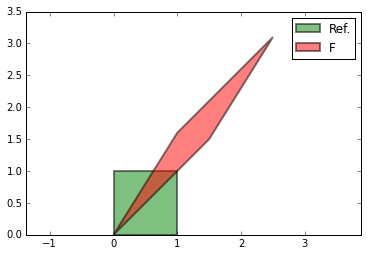

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

patch1 = patches.PathPatch(ref_polygon, facecolor='green', alpha=0.5, lw=2, label='Ref.')
patch2 = patches.PathPatch(polygon_by_F, facecolor='red', alpha=0.5, lw=2, label='F')
ax.add_patch(patch1)
ax.add_patch(patch2)

ax.set_xlim(-2,10)
ax.set_ylim(-2,10)
ax.axis('equal')
plt.legend()

plt.show(fig)
#fig.savefig('F_mapping01.pdf',format='pdf')

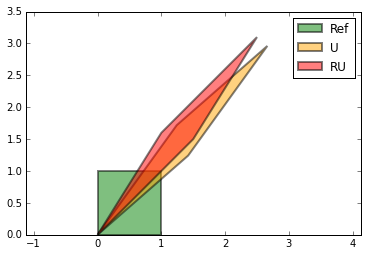

In [18]:
# Modified from http://matplotlib.org/users/path_tutorial.html.
fig = plt.figure()
ax = fig.add_subplot(111)

patch1 = patches.PathPatch(ref_polygon, facecolor='green', alpha=0.5, lw=2, label='Ref')
patch2 = patches.PathPatch(polygon_by_U, facecolor='orange', alpha=0.5, lw=2, label='U')
patch3 = patches.PathPatch(polygon_by_RuU, facecolor='red', alpha=0.5, lw=2, label='RU')
ax.add_patch(patch1)
ax.add_patch(patch2)
ax.add_patch(patch3)

ax.set_xlim(-2,10)
ax.set_ylim(-2,10)
ax.axis('equal')

plt.legend()
plt.show(fig)
#fig.savefig('F_mapping01.pdf',format='pdf')

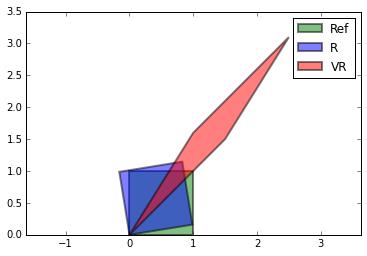

In [19]:
# Modified from http://matplotlib.org/users/path_tutorial.html.
fig = plt.figure()
ax = fig.add_subplot(111)

patch1 = patches.PathPatch(ref_polygon, facecolor='green', alpha=0.5, lw=2, label='Ref')
patch2 = patches.PathPatch(polygon_by_Rv, facecolor='blue', alpha=0.5, lw=2, label='R')
patch3 = patches.PathPatch(polygon_by_VRv, facecolor='red', alpha=0.5, lw=2, label='VR')
ax.add_patch(patch1)
ax.add_patch(patch2)
ax.add_patch(patch3)

ax.set_xlim(-2,10)
ax.set_ylim(-2,10)
ax.axis('equal')

plt.legend()
plt.show(fig)
#fig.savefig('F_mapping01.pdf',format='pdf')

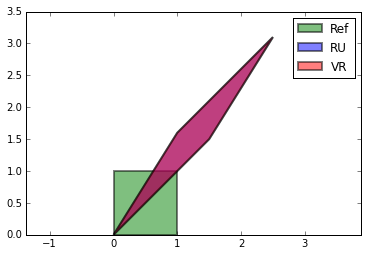

In [22]:
# Modified from http://matplotlib.org/users/path_tutorial.html.
fig = plt.figure()
ax = fig.add_subplot(111)

patch1 = patches.PathPatch(ref_polygon, facecolor='green', alpha=0.5, lw=2, label='Ref')
patch2 = patches.PathPatch(polygon_by_RuU, facecolor='blue', alpha=0.5, lw=2, label='RU')
patch3 = patches.PathPatch(polygon_by_VRv, facecolor='red', alpha=0.5, lw=2, label='VR')
ax.add_patch(patch1)
ax.add_patch(patch2)
ax.add_patch(patch3)

ax.set_xlim(-2,10)
ax.set_ylim(-2,10)
ax.axis('equal')

plt.legend()
plt.show(fig)
#fig.savefig('F_mapping01.pdf',format='pdf')